# Sine RNN

Compare effects of gates in ability to delay a sine-wave.

In [45]:
from math import sin, pi
import matplotlib.pyplot as plt
import numpy as np

## Sine

In [113]:
wave = []
for x in range(int(400*pi)):
    a = sin(x/100)
    wave.append(a/2)

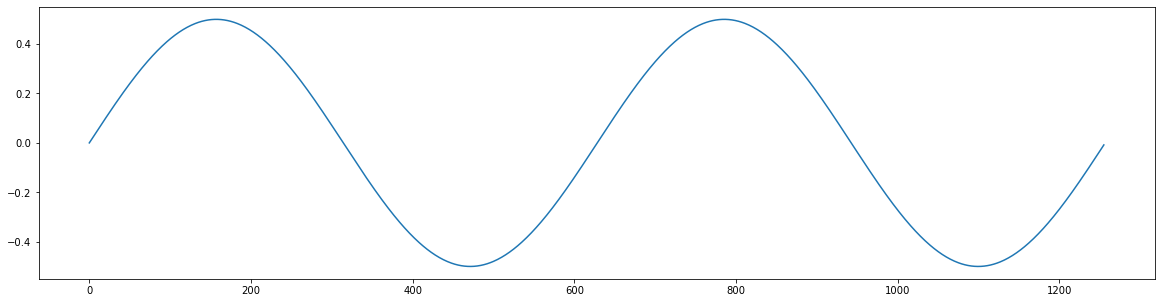

In [114]:
plt.figure(figsize=(20,5))
plt.plot(wave)
plt.show()
plt.close()

## Update gate

In [121]:
class UpdateGate:
    def __init__(self, u):
        self.hx = 0
        assert 0 <= u <= 1
        self.u = u
    
    def __call__(self, inp):
        self.hx = self.u * self.hx + (1-self.u) * inp
        return self.hx

In [122]:
def create_u_wave(delay):
    u = UpdateGate(delay)
    u_wave = []
    for w in wave:
        u_wave.append(u(w))
    
    plt.figure(figsize=(5,2))
    plt.plot(wave, label="input")
    plt.plot(u_wave, label="hidden")
    plt.legend()
    plt.xticks([int(100*pi*i/2) for i in range(9)], ["0" if i == 0 else f"{i}pi" if i % 2 == 0 else f"{i}/2pi" for i in range(9)])
    plt.xlim(0, int(400*pi))
#     plt.savefig(f"delete_me/sine_delayed.png", bbox_inches='tight', pad_inches=0.02)
#     plt.savefig(f"delete_me/sine_delayed.eps", format="eps", bbox_inches='tight', pad_inches=0.02)
    plt.show()
    plt.close()

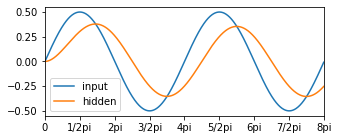

In [123]:
create_u_wave(0.99)

## SRU

In [125]:
class SRU:
    def __init__(self, c_xh, c_hh, b):
        self.hx = 0
        self.c_xh = c_xh
        self.c_hh = c_hh
        self.b = b
    
    def __call__(self, inp):
        self.hx = np.tanh(self.c_xh * inp + self.c_hh * self.hx + self.b)
        return self.hx

In [156]:
def create_sru_wave(c_xh, c_hh, b):
    sru = SRU(c_xh, c_hh, b)
    sru_wave = []
    for x in wave:
        sru_wave.append(sru(x))
    
    plt.figure(figsize=(15,5))
#     plt.plot(wave, label="wave")
    plt.plot(sru_wave[4:], label="sru_wave")
    plt.xticks([int(100*pi*i/2) for i in range(9)], ["0" if i == 0 else f"{i}pi" if i % 2 == 0 else f"{i}/2pi" for i in range(9)])
    plt.xlim(0, int(400*pi))
    plt.grid()
    plt.legend()
    plt.show()
    plt.close()

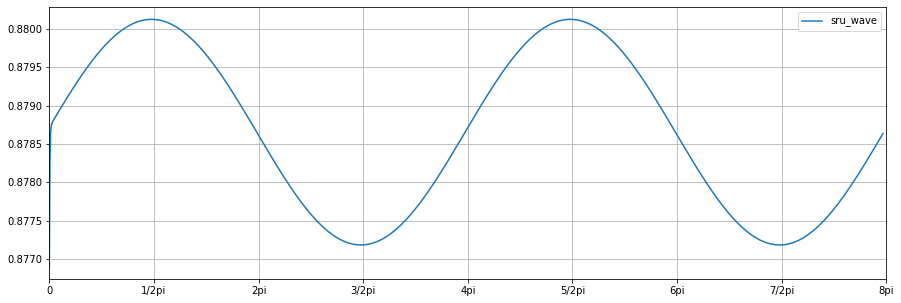

In [157]:
create_sru_wave(0.01, .99, 0.5)

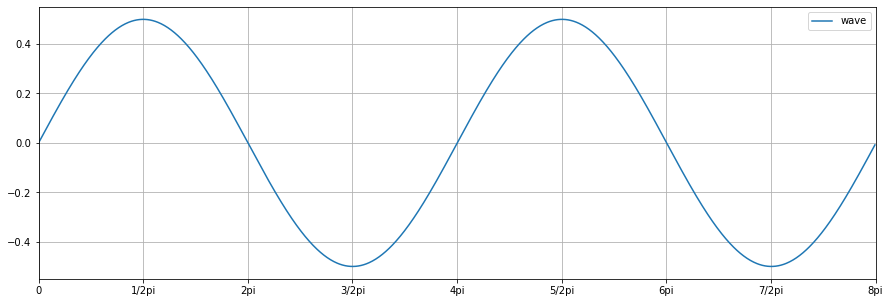

In [155]:
plt.figure(figsize=(15,5))
plt.plot(wave, label="wave")
plt.xticks([int(100*pi*i/2) for i in range(9)], ["0" if i == 0 else f"{i}pi" if i % 2 == 0 else f"{i}/2pi" for i in range(9)])
plt.xlim(0, int(400*pi))
plt.grid()
plt.legend()
plt.show()
plt.close()